In [1]:
#for data preparation and analysis
import pandas as pd
#for creating plots
import matplotlib.pyplot as plt
#for distribution plot and heatmap
import seaborn as sns

#for creating training and test samples
from sklearn.model_selection import train_test_split

#feature selection (to select significant variables)
from sklearn.feature_selection import SelectKBest, f_regression

#for building Linear Regression model
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"C:\Users\amith\OneDrive\Desktop\introtallent\python\Data Files used in Projects\Data Files used in Projects\Investment.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Invested
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,No
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,No
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,Yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,No
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,Yes


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Invested
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,No
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,No
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,No
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,No


In [6]:
df.shape

(41188, 21)

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
Invested           object
dtype: object

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'Invested'],
      dtype='object')

# Variable Description
* Target Variable: "Invested"
* Independant variables:
* Age
* Job
* Marital
* Education
* Default
* Housing
* Loan
* Contact
* Month
* Day_of_week
* Duration
* Campaign
* Pdays
* Previous
* Poutcome
* Emp_var_rate
* cons_price_idx
* cons_conf_idx
* euribor3m
* nr_employed

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
Invested          0
dtype: int64

In [11]:
# Check Outliers

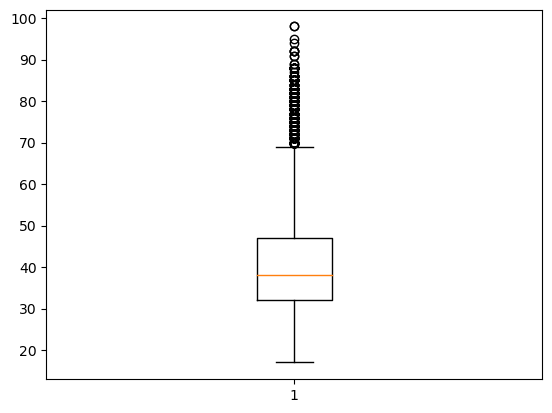

In [12]:
plt.boxplot(df["age"])
plt.show()

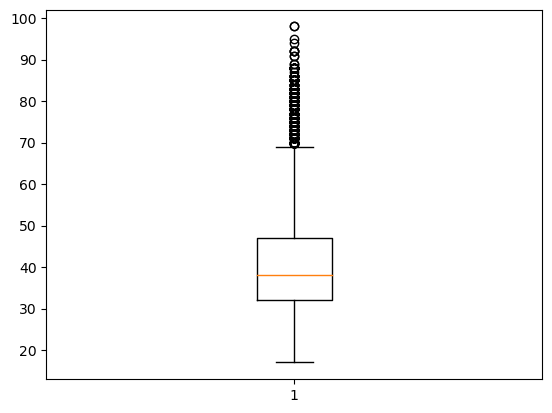

In [13]:
plt.boxplot(df["age"])
plt.show()

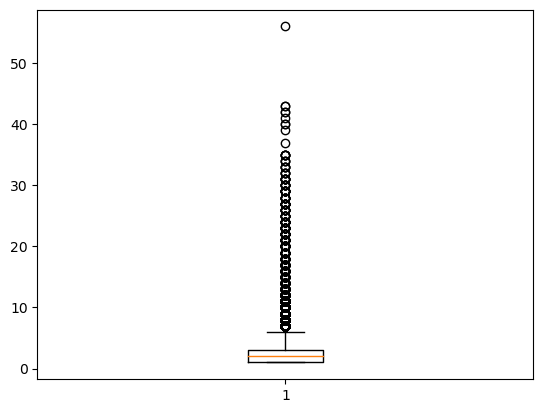

In [14]:
plt.boxplot(df["campaign"])
plt.show()

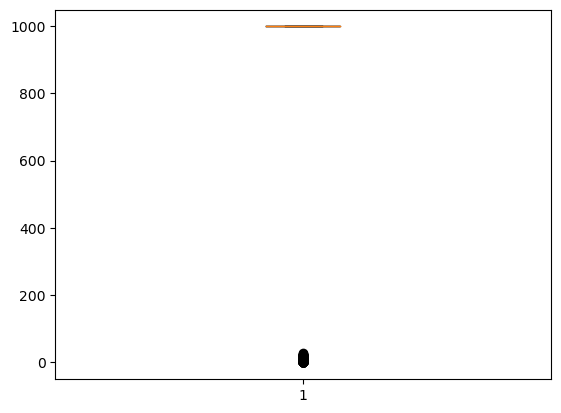

In [15]:
plt.boxplot(df["pdays"])
plt.show()

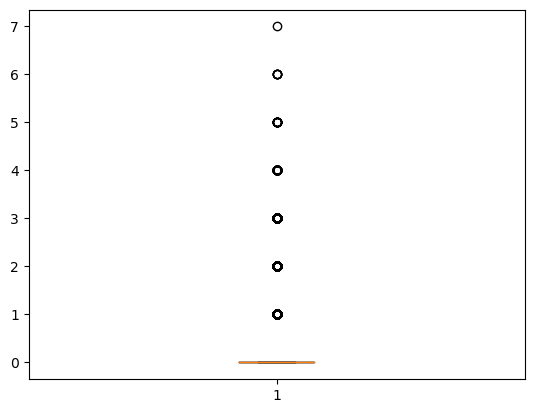

In [16]:
plt.boxplot(df["previous"])
plt.show()

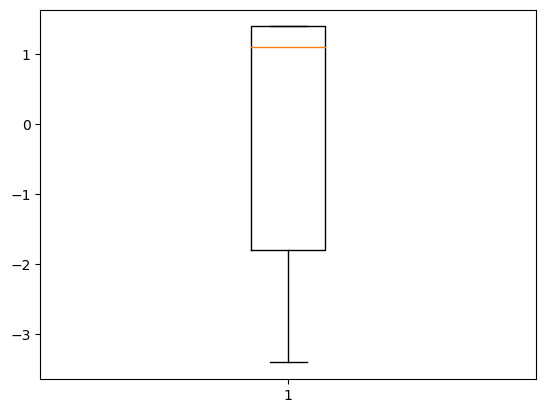

In [17]:
plt.boxplot(df["emp_var_rate"])
plt.show()

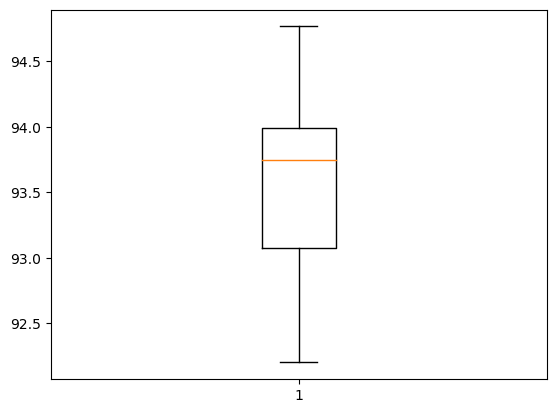

In [18]:
plt.boxplot(df["cons_price_idx"])
plt.show()

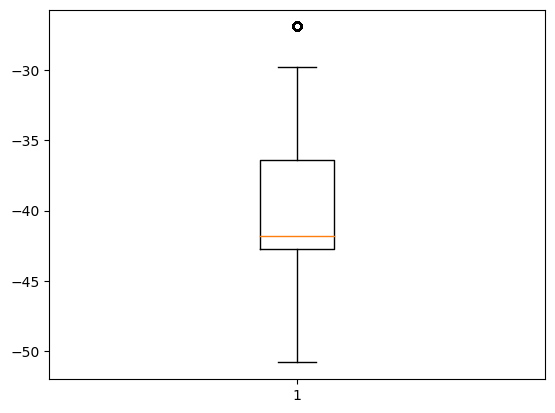

In [19]:
plt.boxplot(df["cons_conf_idx"])
plt.show()

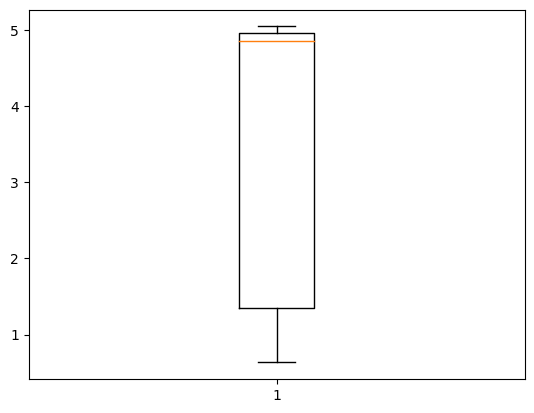

In [20]:
plt.boxplot(df["euribor3m"])
plt.show()

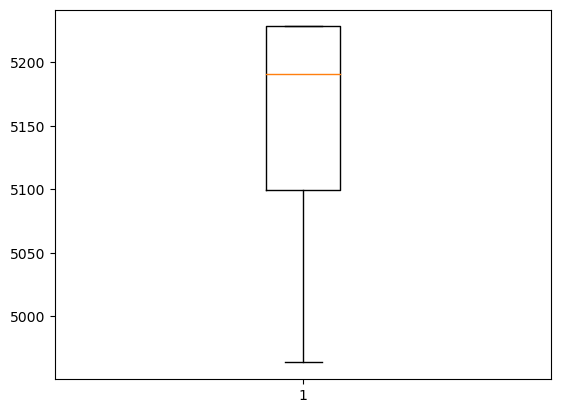

In [21]:
plt.boxplot(df["nr_employed"])
plt.show()

In [23]:
#user defined function outlier treatment

def remove_outlier(d,c):
    #find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #calculate iqr
    iqr=q3-q1
    
    #calculate upper bound (ub) and lower bound(lb)
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    #select good data and exclude outlier
    good_data=d[(d[c]>lb) & (d[c]<ub)]
    
    return good_data

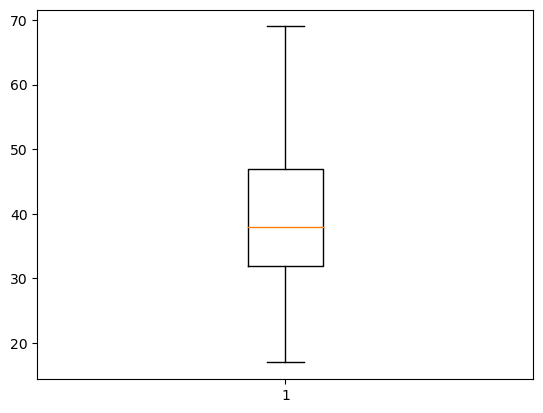

In [24]:
df=remove_outlier(df,"age")
plt.boxplot(df["age"])
plt.show()

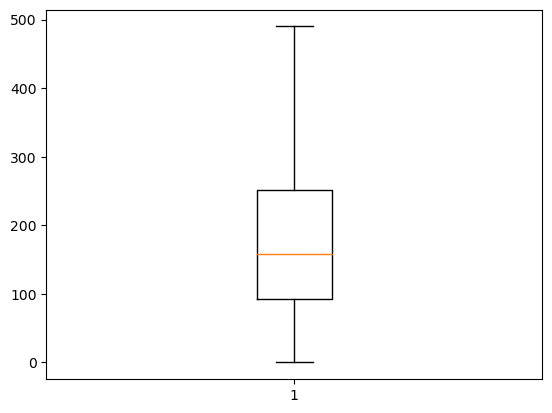

In [30]:
df=remove_outlier(df,"duration")
plt.boxplot(df["duration"])
plt.show()

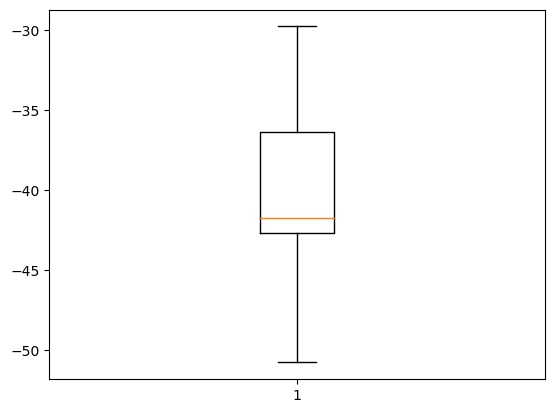

In [31]:
df=remove_outlier(df,"cons_conf_idx")
plt.boxplot(df["cons_conf_idx"])
plt.show()

In [32]:
df.shape

(35350, 21)

# EDA (Exploratory Data Analysis)
* Distribution
* Data Mix
* Corelation

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'Invested'],
      dtype='object')

In [35]:
# "age", "duration, "emp_var_rate", "cons_price_idx", "euribor3m", "nr_employed"

C:\Users\amith\AppData\Local\Temp\ipykernel_7120\316555093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

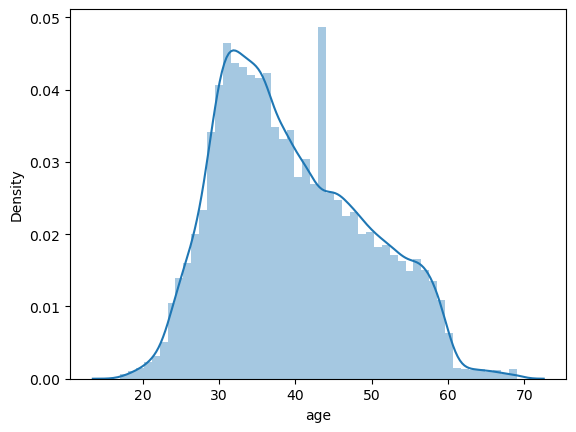

In [36]:
sns.distplot(df["age"])

C:\Users\amith\AppData\Local\Temp\ipykernel_7120\4239709261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["duration"])


<Axes: xlabel='duration', ylabel='Density'>

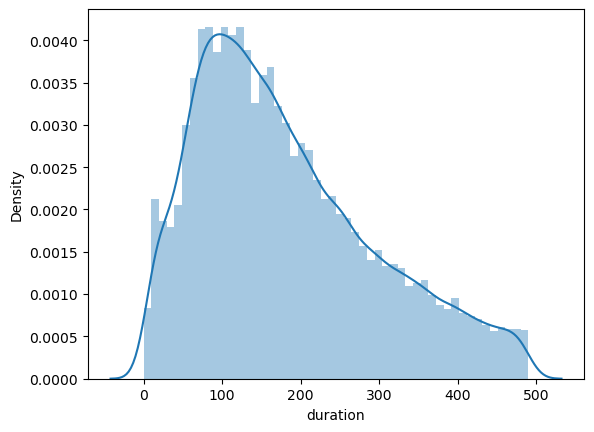

In [37]:
sns.distplot(df["duration"])

C:\Users\amith\AppData\Local\Temp\ipykernel_7120\4002213783.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["emp_var_rate"])


<Axes: xlabel='emp_var_rate', ylabel='Density'>

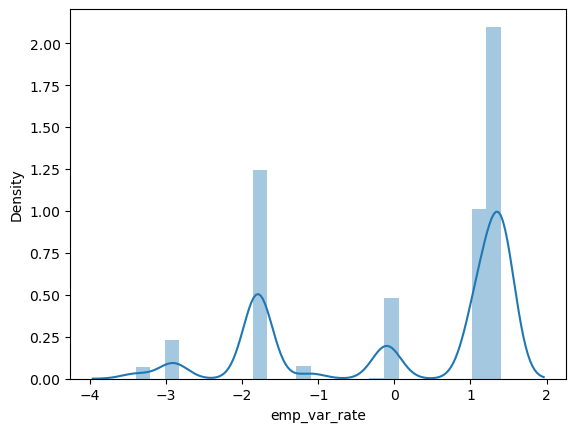

In [38]:
sns.distplot(df["emp_var_rate"])

C:\Users\amith\AppData\Local\Temp\ipykernel_7120\3182414421.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cons_price_idx"])


<Axes: xlabel='cons_price_idx', ylabel='Density'>

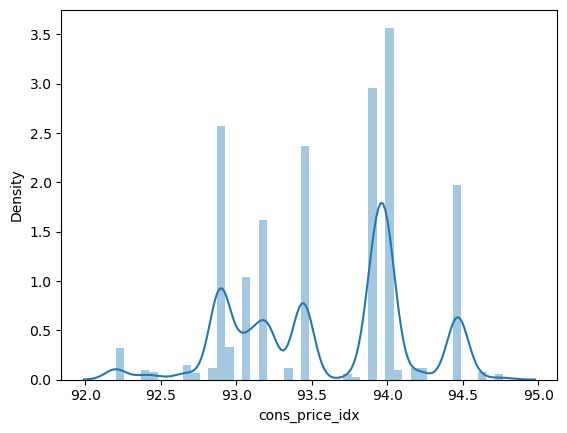

In [39]:
sns.distplot(df["cons_price_idx"])

C:\Users\amith\AppData\Local\Temp\ipykernel_7120\2144558184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["euribor3m"])


<Axes: xlabel='euribor3m', ylabel='Density'>

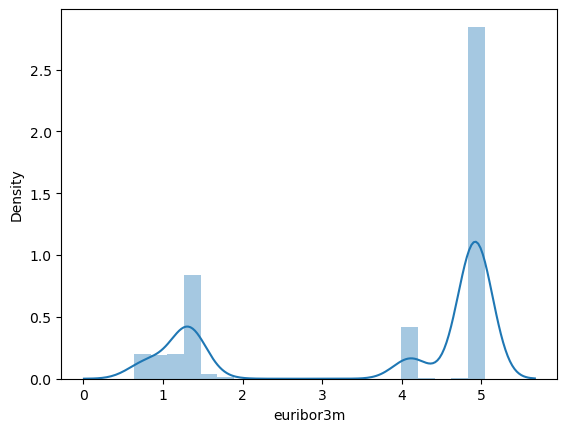

In [40]:
sns.distplot(df["euribor3m"])

C:\Users\amith\AppData\Local\Temp\ipykernel_7120\2165426276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["nr_employed"])


<Axes: xlabel='nr_employed', ylabel='Density'>

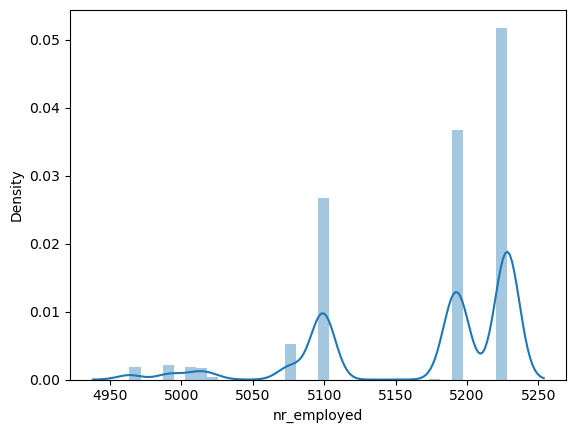

In [41]:
sns.distplot(df["nr_employed"])

C:\Users\amith\AppData\Local\Temp\ipykernel_7120\4094758516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["campaign"])


<Axes: xlabel='campaign', ylabel='Density'>

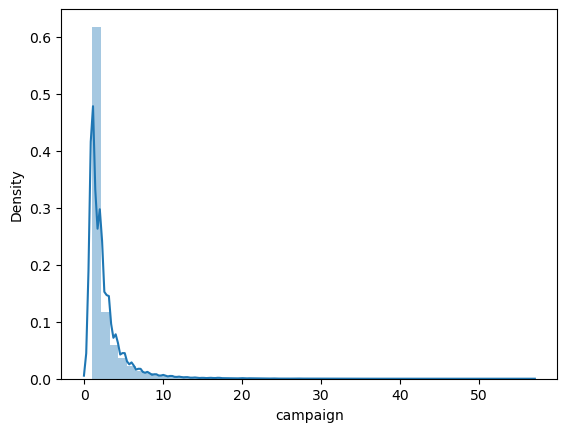

In [42]:
sns.distplot(df["campaign"])

C:\Users\amith\AppData\Local\Temp\ipykernel_7120\3933214858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["pdays"])


<Axes: xlabel='pdays', ylabel='Density'>

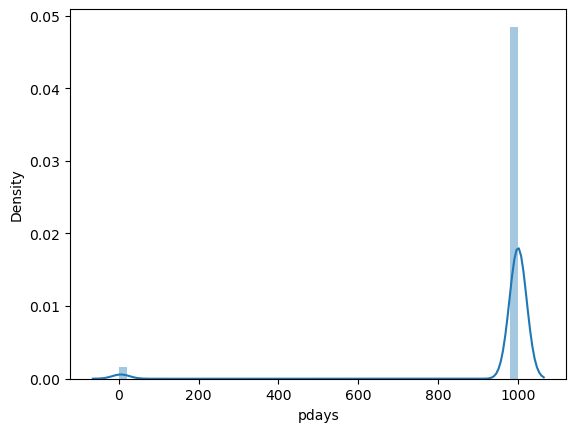

In [43]:
sns.distplot(df["pdays"])

C:\Users\amith\AppData\Local\Temp\ipykernel_7120\2677528501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["previous"])


<Axes: xlabel='previous', ylabel='Density'>

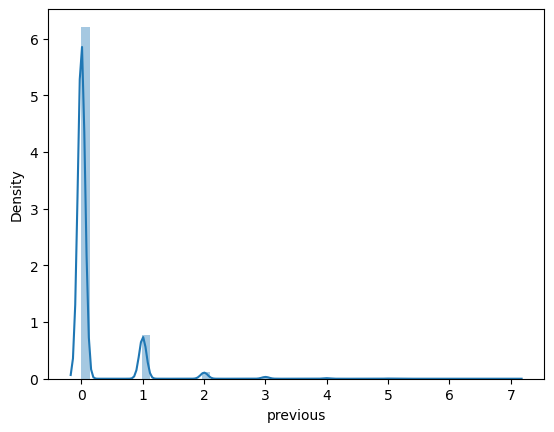

In [44]:
sns.distplot(df["previous"])

In [45]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'Invested'],
      dtype='object')

In [46]:
#check datamix

<Axes: xlabel='job'>

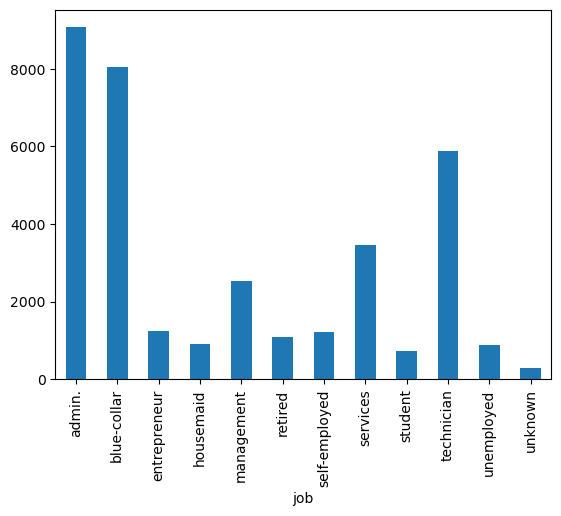

In [47]:
df.groupby('job')['job'].count().plot(kind='bar')

<Axes: xlabel='marital'>

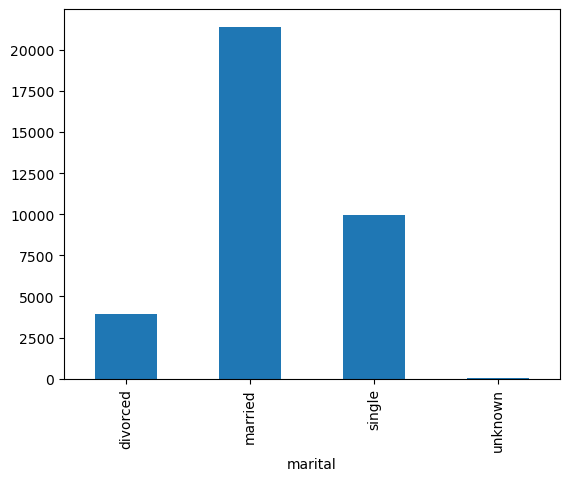

In [48]:
df.groupby('marital')['marital'].count().plot(kind='bar')

<Axes: xlabel='education'>

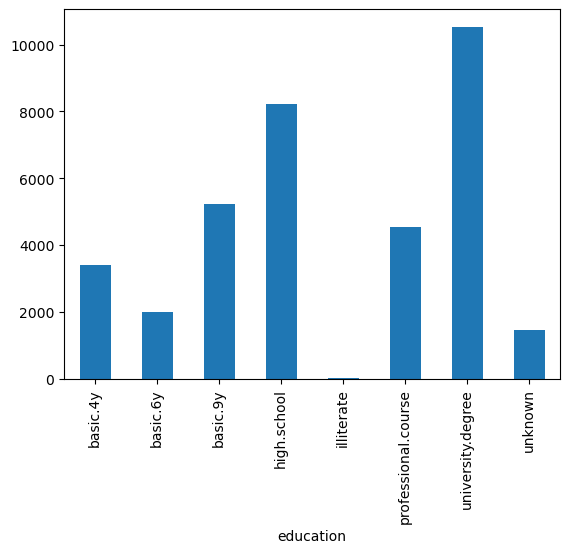

In [50]:
df.groupby('education')['education'].count().plot(kind='bar')

<Axes: xlabel='default'>

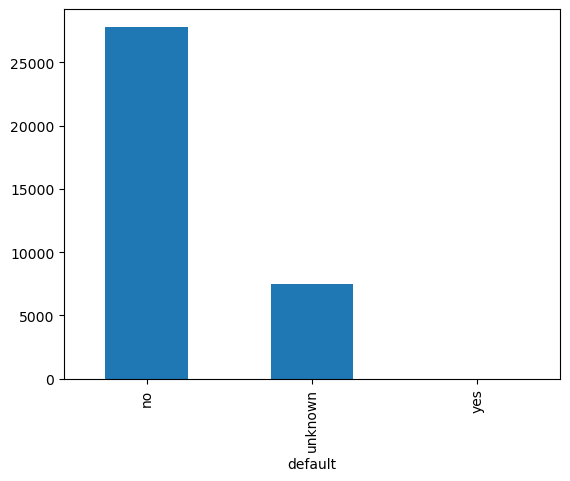

In [51]:
df.groupby('default')['default'].count().plot(kind='bar')

<Axes: xlabel='housing'>

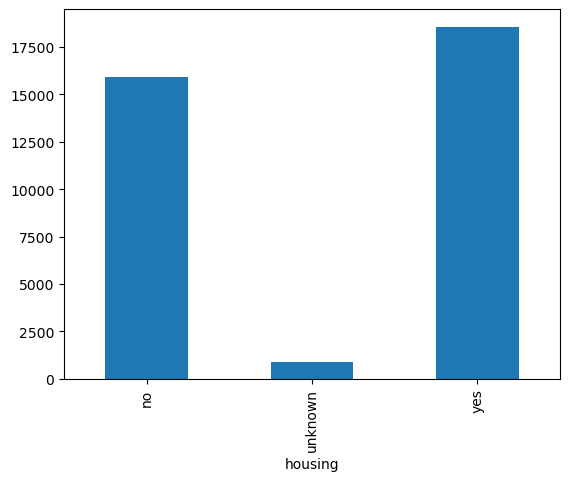

In [52]:
df.groupby('housing')['housing'].count().plot(kind='bar')

<Axes: xlabel='loan'>

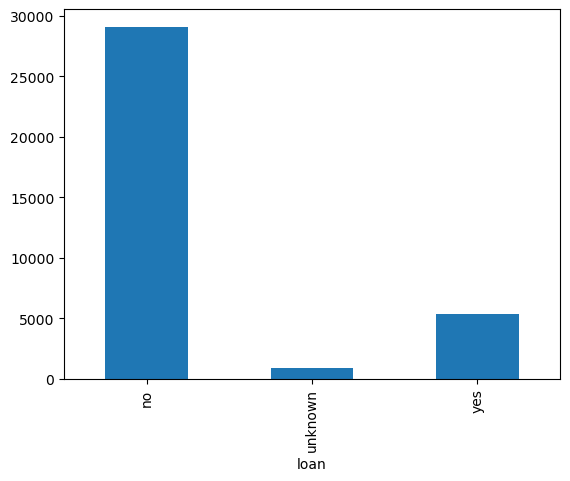

In [53]:
df.groupby('loan')['loan'].count().plot(kind='bar')

<Axes: xlabel='contact'>

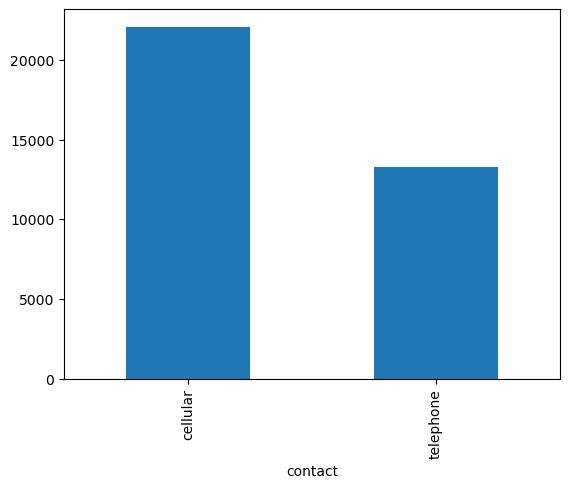

In [54]:
df.groupby('contact')['contact'].count().plot(kind='bar')

<Axes: xlabel='month'>

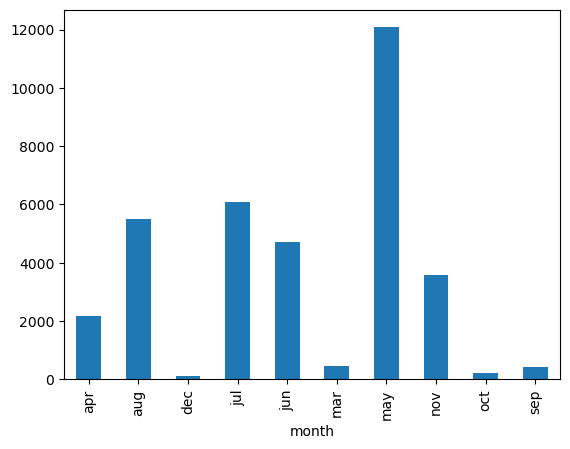

In [55]:
df.groupby('month')['month'].count().plot(kind='bar')

<Axes: xlabel='day_of_week'>

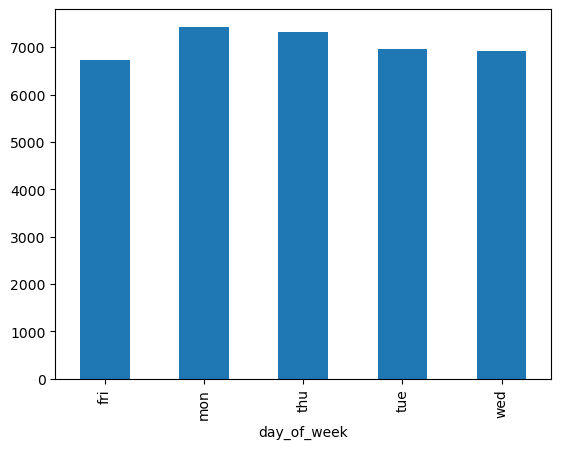

In [56]:
df.groupby('day_of_week')['day_of_week'].count().plot(kind='bar')

<Axes: xlabel='poutcome'>

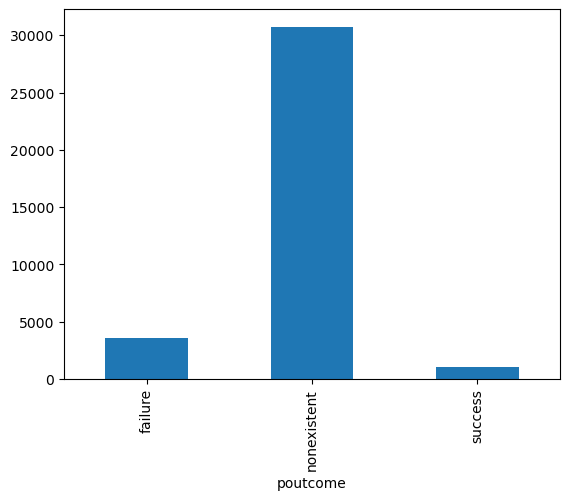

In [57]:
df.groupby('poutcome')['poutcome'].count().plot(kind='bar')

<Axes: xlabel='Invested'>

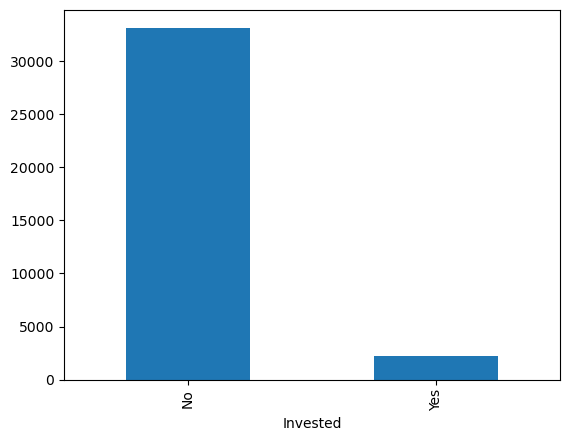

In [58]:
df.groupby('Invested')['Invested'].count().plot(kind='bar')

# Pearson Correlation

In [60]:
#create a set of numeric columns
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2


In [61]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [62]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [63]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [64]:
df['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [65]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [66]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)